In [2]:
%matplotlib inline

import cv2
import os, time
import matplotlib.pyplot as plt

In [79]:
image_directory = "/home/pi/Desktop/minor_project/images/"
faces_directory = "/home/pi/Desktop/minor_project/images/faces/"
training_directory = "/home/pi/Desktop/minor_project/code/pre_processing/training/"

In [59]:
filename = image_directory + "Rpi_031718121915.jpg"

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

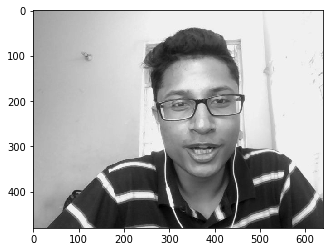

In [49]:
image = cv2.imread(filename)
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage, cmap = "gray")

In [50]:
haarFaceCascade = cv2.CascadeClassifier('training/haarcascade_frontalface_alt.xml')

Number of faces found: 1


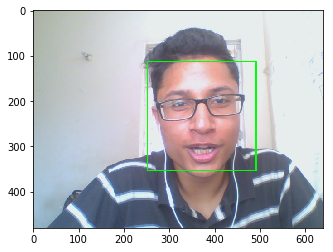

In [51]:
faces = haarFaceCascade.detectMultiScale(grayImage, scaleFactor = 1.1, minNeighbors = 5)
print "Number of faces found: %s" %(len(faces))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(convertToRGB(image))

In [84]:
def deleteAllFiles(directory):
    filelist = [f for f in os.listdir(directory)]
    for f in filelist:
        os.remove(os.path.join(directory, f))

Number of faces found: 8


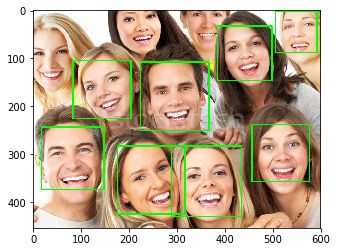

In [91]:
def violaJones(filename, trainingFile, scaleFactor = 1.2):
    image = cv2.imread(image_directory + filename)
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    haarFaceCascade = cv2.CascadeClassifier(training_directory + trainingFile)
    faces = haarFaceCascade.detectMultiScale(grayImage, scaleFactor = scaleFactor, minNeighbors = 5)
    print "Number of faces found: %s" %(len(faces))

    deleteAllFiles(faces_directory)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        sub_face = image[y : y + h, x : x + w]
        
        faceFile = faces_directory + "face_" + str(y) + ".jpg"
        cv2.imwrite(faceFile, sub_face)
    image = convertToRGB(image)
    return image

filename = "Rpi_031718121918.jpg"
trainingFile = "haarcascade_frontalface_default.xml"
image = violaJones(filename, trainingFile)
plt.imshow(image)